In [1]:
#mini project 

In [3]:
!pip install nltk textblob wordcloud matplotlib pandas

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Varsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📊 Text Statistics:
Words: 176
Sentences: 6
Characters: 1082

📝 Summary:
Natural Language Processing (NLP) is a field of artificial intelligence that gives computers the ability to understand text and spoken words in much the same way human beings can. Together, these technologies enable computers to process human language in the form of text or voice data and to 'understand' its full meaning, complete with the speaker or writer's intent and sentiment. NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time.

💬 Sentiment Analysis:
Sentiment Score: 0.08
Sentiment Label: Positive

🔑 Keywords:


,Word,Frequency
0,nlp,5
1,text,4
2,language,3
3,human,3
4,computers,2
5,spoken,2
6,learning,2
7,form,2
8,business,2
9,natural,1



☁ Word Cloud:


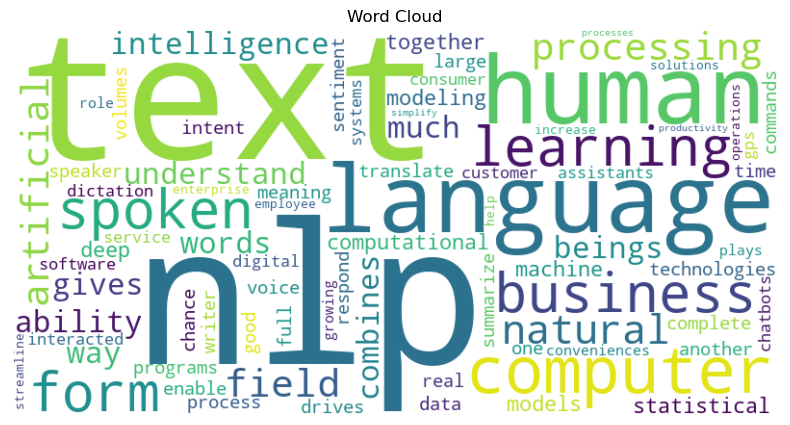


📈 Word Frequency:


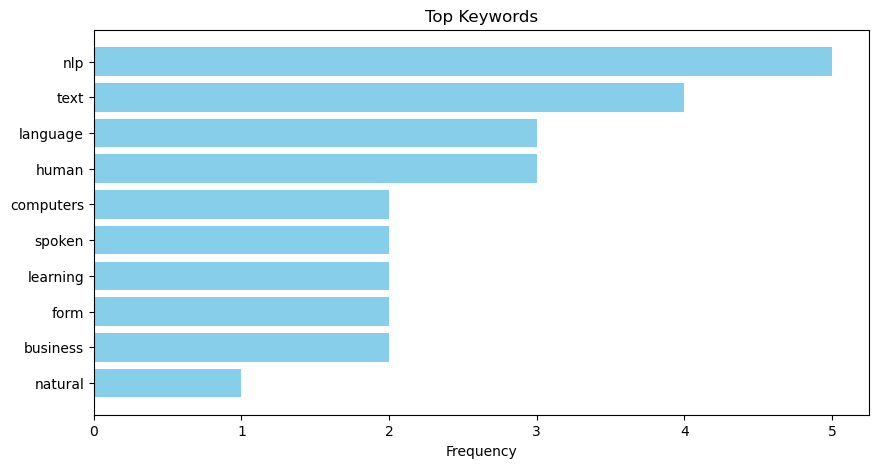

In [15]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from textblob import TextBlob

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')

# Sample text
sample_text = """Natural Language Processing (NLP) is a field of artificial intelligence that gives computers the ability to understand text and spoken words in much the same way human beings can. NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to 'understand' its full meaning, complete with the speaker or writer's intent and sentiment.

NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time. There's a good chance you've interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences. But NLP also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes."""

# Functions
def preprocess_text(text):
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word.isalnum() and word not in stop_words]

def extract_keywords(words, num_keywords=10):
    fdist = FreqDist(words)
    return fdist.most_common(num_keywords)

def simple_summarize(text, num_sentences=3):
    sentences = sent_tokenize(text)
    if len(sentences) <= num_sentences:
        return text
    words = preprocess_text(text)
    word_freq = FreqDist(words)
    sentence_scores = {}
    for i, sentence in enumerate(sentences):
        for word in word_tokenize(sentence.lower()):
            if word in word_freq:
                sentence_scores[i] = sentence_scores.get(i, 0) + word_freq[word]
    top_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)[:num_sentences]
    top_sentences = sorted(top_sentences, key=lambda x: x[0])
    return ' '.join([sentences[i] for i, _ in top_sentences])

def create_wordcloud(words):
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

def plot_word_frequency(keywords):
    df = pd.DataFrame(keywords, columns=['Word', 'Count'])
    plt.figure(figsize=(10, 5))
    plt.barh(df['Word'], df['Count'], color='skyblue')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()
    plt.title("Top Keywords")
    plt.show()

def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return polarity, "Positive"
    elif polarity < 0:
        return polarity, "Negative"
    else:
        return polarity, "Neutral"

def analyze_text(text, num_sentences=3, num_keywords=10):
    print("📊 Text Statistics:")
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    print(f"Words: {len(words)}")
    print(f"Sentences: {len(sentences)}")
    print(f"Characters: {len(text)}\n")

    print("📝 Summary:")
    print(simple_summarize(text, num_sentences))
    print("\n💬 Sentiment Analysis:")
    score, label = analyze_sentiment(text)
    print(f"Sentiment Score: {score:.2f}")
    print(f"Sentiment Label: {label}")

    print("\n🔑 Keywords:")
    processed_words = preprocess_text(text)
    keywords = extract_keywords(processed_words, num_keywords)
    df = pd.DataFrame(keywords, columns=["Word", "Frequency"])
    display(df)

    print("\n☁ Word Cloud:")
    create_wordcloud(processed_words)

    print("\n📈 Word Frequency:")
    plot_word_frequency(keywords)

# --- Run the analysis ---
# You can change the text or use the sample
text_input = sample_text  # Or: input("Paste your text here:\n")

analyze_text(text_input, num_sentences=3, num_keywords=10)